# Figure 2

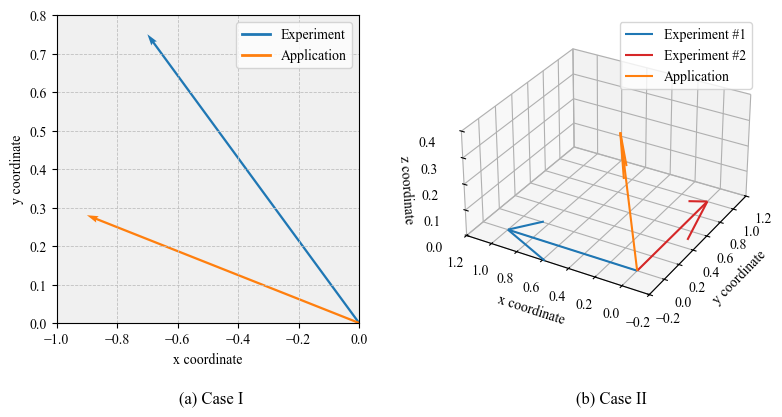

In [124]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Global font
plt.rcParams["font.family"] = "Times New Roman"

# ----- Data -----
vec2d = np.array([[-0.7, 0.75],  # Experiment
                  [-0.9, 0.28]]) # Application
labels2d  = ["Experiment", "Application"]
colors2d  = ["tab:blue", "tab:orange"]

vec3d = np.array([[1.0, 0.0, 0.0],   # Experiment #1
                  [0.0, 1.0, 0.0],   # Experiment #2
                  [0.3, 0.3, 0.4]])  # Application
labels3d = ["Experiment #1", "Experiment #2", "Application"]
colors3d = ["tab:blue", "tab:red", "tab:orange"]

# ----- Figure layout (narrow spacing) -----
fig = plt.figure(figsize=(10,4))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.5], wspace=0.05)

# ================= Left: 2D =================
ax1 = fig.add_subplot(gs[0, 0])

# Background gray + grid
ax1.set_facecolor("#f0f0f0")
ax1.grid(True, linestyle="--", linewidth=0.6, color="#bfbfbf")

# 2D vectors from origin
for (vx, vy), c in zip(vec2d, colors2d):
    ax1.quiver(0, 0, vx, vy, angles="xy", scale_units="xy", scale=1, color=c)

# Axis limits and labels
ax1.set_xlim(-1.0, 0.0)
ax1.set_ylim(0.0, 0.8)
ax1.set_xlabel("x coordinate")
ax1.set_ylabel("y coordinate")

# Legend as line handles
proxy_lines = [Line2D([0], [0], color=colors2d[0], lw=2),
               Line2D([0], [0], color=colors2d[1], lw=2)]
ax1.legend(proxy_lines, labels2d, loc="upper right")

# ================= Right: 3D =================
ax2 = fig.add_subplot(gs[0, 1], projection="3d")

# 3D vectors from origin
for v, lab, col in zip(vec3d, labels3d, colors3d):
    ax2.quiver(0, 0, 0, v[0], v[1], v[2], color=col, label=lab)

# Axis limits
ax2.set_xlim(1.2, -0.2)   # reversed x-axis
ax2.set_ylim(-0.2, 1.2)
ax2.set_zlim(0.0, 0.4)

# Axis labels
ax2.set_xlabel("x coordinate")
ax2.set_ylabel("y coordinate")

# Z ticks left side
ax2.zaxis._axinfo['juggled'] = (1, 1, 0)
ax2.set_zticks([0, 0.1, 0.2, 0.3, 0.4])
ax2.tick_params(axis='z', pad=5)

# Remove default zlabel and add custom one
ax2.set_zlabel("")
ax2.text3D(1.70, -0.18, 0.10, "z coordinate",
           zdir="z", ha="center", va="center")

ax2.set_box_aspect((1.4, 1.4, 0.8))

# Legend
ax2.legend(loc="upper right")

# Caption under subplot (a)
fig.text(0.28, -0.06, "(a) Case I", ha="center", va="top", fontsize=12)

# Caption under subplot (b)
fig.text(0.68, -0.06, "(b) Case II", ha="center", va="top", fontsize=12)

# ----- Save at 600 dpi -----
plt.savefig("figures/Figure 2.png", dpi=600, bbox_inches="tight", pad_inches=0.2)
plt.show()


# Figure 3

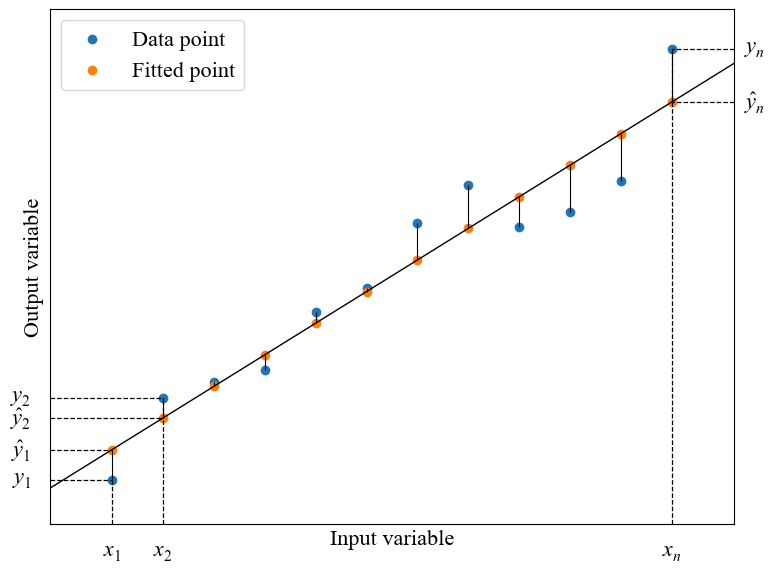

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ----- Global font -----
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Times New Roman"
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"
np.random.seed(32)  # <-- seed 32

# ----- data -----
n = 12
x = np.linspace(1, 10, n)
y_true = 2.0 * x + 1.0
noise = np.random.normal(0, 2.0, n)
y = y_true + noise

X = x.reshape(-1, 1)
model = LinearRegression().fit(X, y)
y_fit = model.predict(X)

# ----- plot -----
fig, ax = plt.subplots(figsize=(8, 6))

# points & fitted
ax.scatter(x, y, color='C0', label='Data point')
ax.scatter(x, y_fit, color='C1', label='Fitted point')

# residuals (keep)
for xi, yi, yfi in zip(x, y, y_fit):
    ax.vlines(xi, yi, yfi, color='k', lw=0.8)

# axis labels (ticks removed)
ax.set_xlabel("Input variable")
ax.set_ylabel("Output variable")
ax.set_xticks([])   # remove x ticks
ax.set_yticks([])   # remove y ticks

# only the leftmost dashed guides
# get limits AFTER plotting (so we know canvas edges)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# --- extend fitted line to graph ends ---
xx = np.array([0, 11]).reshape(-1, 1)
yy = model.predict(xx)
ax.plot(xx, yy, color='k', lw=1)

ax.set_xlim(0, 11)
ax.set_ylim(0, 27)

# --- labels for first point ---
ax.hlines(y[0], 0, x[0], linestyles='dashed', colors='k', lw=0.9)
ax.vlines(x[0], 0, y[0], linestyles='dashed', colors='k', lw=0.9)
ax.hlines(y_fit[0], 0, x[0], linestyles='dashed', colors='k', lw=0.9)

ax.text(-0.3, y[0], r"$y_1$", ha="right", va="center")
ax.text(x[0], -1.0, r"$x_1$", ha="center", va="top")
ax.text(-0.3, y_fit[0], r"$\hat{y}_1$", ha="right", va="center")

# --- labels for second point (index 1) ---
ax.hlines(y[1], 0, x[1], linestyles='dashed', colors='k', lw=0.9)
ax.vlines(x[1], 0, y[1], linestyles='dashed', colors='k', lw=0.9)
ax.hlines(y_fit[1], 0, x[1], linestyles='dashed', colors='k', lw=0.9)

ax.text(-0.3, y[1], r"$y_2$", ha="right", va="center")
ax.text(x[1], -1.0, r"$x_2$", ha="center", va="top")
ax.text(-0.3, y_fit[1], r"$\hat{y}_2$", ha="right", va="center")

# --- labels for last point (index -1, call it n) ---
iN = -1
ax.hlines(y[iN], 11, x[iN], linestyles='dashed', colors='k', lw=0.9)
ax.vlines(x[iN], 0, y[iN], linestyles='dashed', colors='k', lw=0.9)
ax.hlines(y_fit[iN], 11, x[iN], linestyles='dashed', colors='k', lw=0.9)

ax.text(x[iN], -1.0, r"$x_n$", ha="center", va="top")
ax.text(xmax+0.7, y[iN], r"$y_n$", ha="left", va="center")
ax.text(xmax+0.7, y_fit[iN], r"$\hat{y}_n$", ha="left", va="center")

ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig("figures/Figure 3.png", dpi=600)
plt.show()


# Figure 4

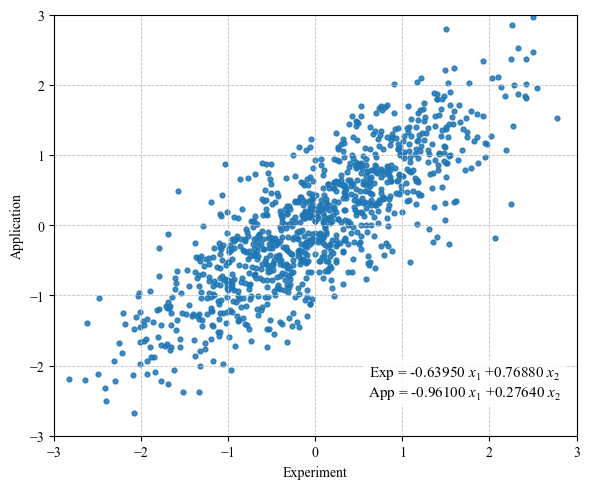

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Times New Roman"
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"

# -----------------------
# Settings
# -----------------------
np.random.seed(7)

# Given unit vectors (sensitivities/gradients)
a1, a2 = -0.6395, 0.7688
b1, b2 = -0.9610, 0.2764

# -----------------------
# Generate data (iid N(0,1))
# -----------------------
n = 1000
x1 = np.random.randn(n)
x2 = np.random.randn(n)

# Realizations
Y_exp = a1 * x1 + a2 * x2
Y_app = b1 * x1 + b2 * x2

# -----------------------
# Plot
# -----------------------
fig, ax = plt.subplots(figsize=(6, 5))

ax.scatter(Y_exp, Y_app, s=12, color="#1f77b4", alpha=0.85)

ax.set_xlabel("Experiment")
ax.set_ylabel("Application")
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.grid(True, linestyle="--", linewidth=0.6, color="#bfbfbf")

# Equation text in the lower-right
eq_text = (
    rf"Exp = {a1:+.5f} $x_1$ {a2:+.5f} $x_2$" + "\n" +
    rf"App = {b1:+.5f} $x_1$ {b2:+.5f} $x_2$"
)
ax.text(0.97, 0.08, eq_text, transform=ax.transAxes, 
        ha="right", va="bottom", fontsize=11, 
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8, edgecolor="none"))

plt.tight_layout()
plt.savefig("figures/Figure 4.png", dpi=600)
plt.show()


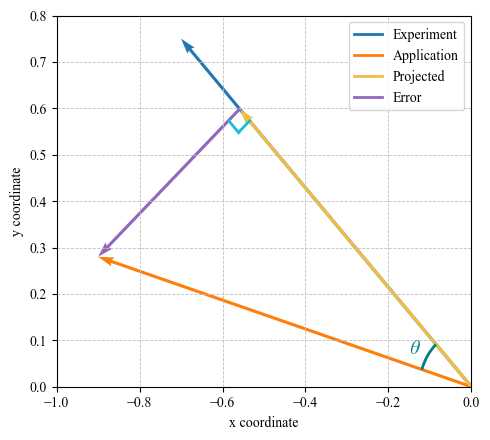

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.lines import Line2D  # <-- 추가

# Style
plt.rcParams["font.family"] = "Times New Roman"

# ---------------------------
# Given vectors
# ---------------------------
e = np.array([-0.7,  0.75])   # Experiment
a = np.array([-0.9,  0.28])   # Application

# Projection of a onto direction of e
p = (a @ e) / (e @ e) * e     # Projected
r = a - p                     # Error (orthogonal to e)

# ---------------------------
# Plot
# ---------------------------
fig, ax = plt.subplots(figsize=(5, 4.5))

ax.grid(True, linestyle="--", linewidth=0.6, color="#bfbfbf")

# Draw arrows
q1 = ax.quiver(0,0, *e, angles='xy', scale_units='xy', scale=1, color='tab:blue')
q2 = ax.quiver(0,0, *a, angles='xy', scale_units='xy', scale=1, color='tab:orange')
q3 = ax.quiver(0,0, *p, angles='xy', scale_units='xy', scale=1, color='#f2be42')  # golden
q4 = ax.quiver(*p, *r, angles='xy', scale_units='xy', scale=1, color='tab:purple')

# Right-angle marker at p (Error ⟂ Experiment)
u = e / np.linalg.norm(e)           # along Experiment
n = np.array([-u[1], u[0]])         # perpendicular to Experiment
s = 0.035                           # marker size
corner = p - s*u
dx = 0.05
ax.plot([corner[0], corner[0] + s*n[0]], [corner[1], corner[1] + s*n[1]], color='tab:cyan', lw=2)
ax.plot([corner[0] - dx, corner[0] - s*u[0] - dx], [corner[1], corner[1] - s*u[1]], color='tab:cyan', lw=2)

# Angle θ between Experiment and Application at origin
ang_e = np.degrees(np.arctan2(e[1], e[0]))
ang_a = np.degrees(np.arctan2(a[1], a[0]))
theta0 = min(ang_e, ang_a)
dtheta = abs(ang_e - ang_a)
arc = Arc((0,0), 0.25, 0.25, angle=0, theta1=theta0, theta2=theta0+dtheta, color='teal', lw=2)
ax.add_patch(arc)
ax.text(-0.15, 0.07, r"$\theta$", fontsize=14, color='teal')

# Axes cosmetics
ax.set_xlim(-1.0, 0.0)
ax.set_ylim(0.0, 0.8)
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")

# ---- Custom legend (lines instead of fat arrows) ----
proxy_lines = [
    Line2D([0], [0], color='tab:blue',   lw=2),
    Line2D([0], [0], color='tab:orange', lw=2),
    Line2D([0], [0], color='#f2be42',    lw=2),
    Line2D([0], [0], color='tab:purple', lw=2),
]
ax.legend(proxy_lines, ['Experiment', 'Application', 'Projected', 'Error'], loc="upper right")

plt.tight_layout()
plt.savefig("figures/Figure 5.png", dpi=600)
plt.show()


# Figure 6

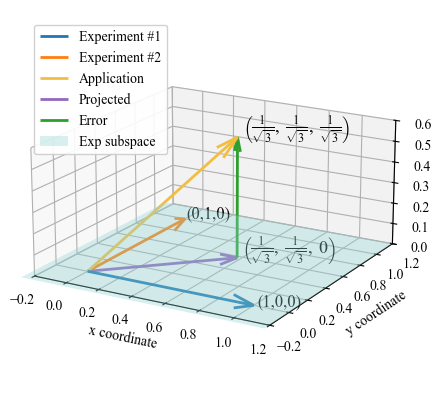

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Patch

# ---------- style (Times New Roman, mathtext도 적용) ----------
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Times New Roman"
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"

# ---------- vectors ----------
e1 = np.array([1.0, 0.0, 0.0])                      # Experiment #1
e2 = np.array([0.0, 1.0, 0.0])                      # Experiment #2
c  = np.ones(3) / np.sqrt(3)                         # Application
cp = c.copy(); cp[2] = 0.0                           # Projected onto xy-plane
err = c - cp                                         # Error (vertical)

# ---------- figure ----------
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection="3d")

# plane z=0 (Exp subspace)
xspan = (-0.25, 1.2)
yspan = (-0.25, 1.2)
verts = [
    [xspan[0], yspan[0], 0.0],
    [xspan[1], yspan[0], 0.0],
    [xspan[1], yspan[1], 0.0],
    [xspan[0], yspan[1], 0.0],
]
plane = Poly3DCollection([verts], facecolors="#8fd3d3", alpha=0.35, edgecolor="none")
ax.add_collection3d(plane)

# helper to draw arrows
def qv(start, vec, color, label):
    ax.quiver(start[0], start[1], start[2],
              vec[0], vec[1], vec[2],
              color=color, linewidth=2, arrow_length_ratio=0.12, label=label)

origin = np.zeros(3)
qv(origin, e1, 'tab:blue',   "Experiment #1")
qv(origin, e2, 'tab:orange', "Experiment #2")
qv(origin, c,  '#f2be42',    "Application")
qv(origin, cp, 'tab:purple', "Projected")
qv(cp, err,   'tab:green',   "Error")

# coordinate labels near tips
ax.text(1.02, 0.00, 0.00, r"(1,0,0)", fontsize=12)
ax.text(0.00, 1.02, 0.00, r"(0,1,0)", fontsize=12)
ax.text(cp[0]+0.02, cp[1]+0.02, cp[2]+0.02,
        r"$\left(\frac{1}{\sqrt{3}},\ \frac{1}{\sqrt{3}},\ 0\right)$",
        fontsize=13)

ax.text(c[0]+0.02, c[1]+0.02, c[2]+0.02,
        r"$\left(\frac{1}{\sqrt{3}},\ \frac{1}{\sqrt{3}},\ \frac{1}{\sqrt{3}}\right)$",
        fontsize=13)


# axes & view
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
ax.set_zlabel("z coordinate")
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_zlim(0.0, 0.6)
ax.set_box_aspect((1.4, 1.4, 0.7))
ax.view_init(elev=18, azim=-60)
ax.grid(True, linestyle="--", linewidth=0.6, color="#bfbfbf")

# legend (add plane proxy)
plane_proxy = Patch(facecolor="#8fd3d3", alpha=0.35, edgecolor="none")
handles, labels = ax.get_legend_handles_labels()
handles.append(plane_proxy); labels.append("Exp subspace")
ax.legend(handles, labels, loc="upper left", bbox_to_anchor=(0.02, 0.98), framealpha=0.9)

plt.savefig("figures/Figure 6.png", dpi=600, bbox_inches="tight")
plt.show()


# Figure 7

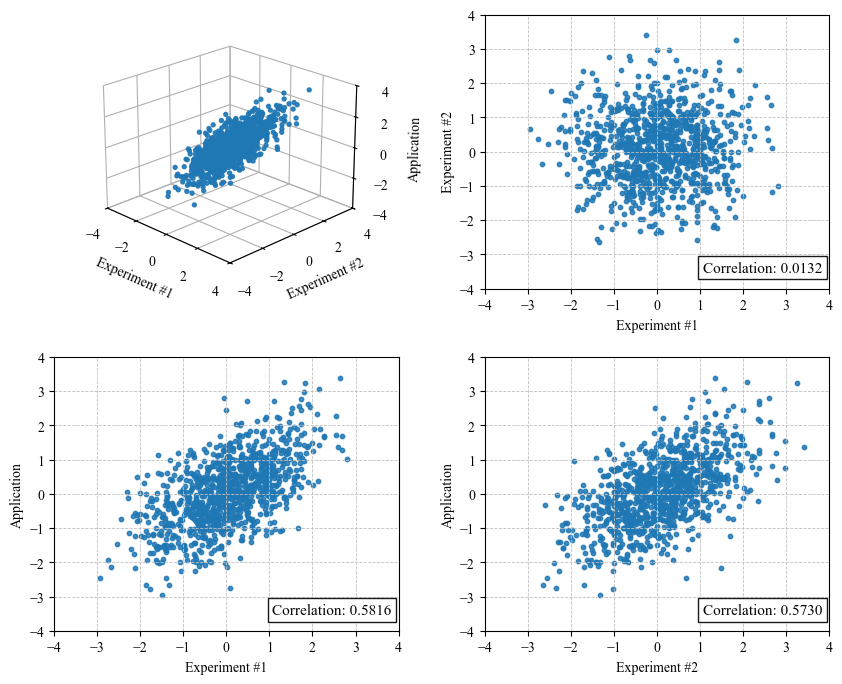

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# -------- Style --------
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Times New Roman"

# -------- Data: Exp#1, Exp#2, App --------
rng = np.random.default_rng(20)
rho = 1/np.sqrt(3)
Sigma = np.array([[1.0, 0.0,  rho],
                  [0.0, 1.0,  rho],
                  [ rho,  rho, 1.0]])
mu = np.zeros(3)

n = 1000

samples = rng.multivariate_normal(mu, Sigma, size=n)
exp1 = samples[:, 0]; exp2 = samples[:, 1]; app = samples[:, 2]

# -------- Helper: squared legend-like box for correlation --------
def annotate_corr(ax, x, y):
    corr = np.corrcoef(x, y)[0, 1]
    ax.text(0.98, 0.05, f"Correlation: {corr:.4f}",
            transform=ax.transAxes, ha="right", va="bottom", fontsize=11,
            bbox=dict(boxstyle="square,pad=0.3",  # <-- 각진 네모 박스
                      fc="white", ec="black", alpha=0.9))

# -------- Figure --------
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 2, wspace=0.25, hspace=0.25)

# (1) 3D scatter (top-left) — background white
ax3d = fig.add_subplot(gs[0, 0], projection="3d")
ax3d.scatter(exp1, exp2, app, s=8, alpha=0.9)
ax3d.set_xlabel("Experiment #1")
ax3d.set_ylabel("Experiment #2")
ax3d.set_zlabel("Application")
ax3d.set_xlim(-4, 4); ax3d.set_ylim(-4, 4); ax3d.set_zlim(-4, 4)
ax3d.view_init(elev=22, azim=-45)

ax3d.set_facecolor("white")
ax3d.xaxis.set_pane_color((1, 1, 1, 1))
ax3d.yaxis.set_pane_color((1, 1, 1, 1))
ax3d.zaxis.set_pane_color((1, 1, 1, 1))

# (2) Exp1 vs Exp2 (top-right)
ax12 = fig.add_subplot(gs[0, 1])
ax12.scatter(exp1, exp2, s=10, alpha=0.85)
ax12.set_xlabel("Experiment #1"); ax12.set_ylabel("Experiment #2")
ax12.set_xlim(-4, 4); ax12.set_ylim(-4, 4)
ax12.grid(True, ls="--", lw=0.6, color="#bfbfbf")
ax12.set_facecolor("white")
annotate_corr(ax12, exp1, exp2)

# (3) Exp1 vs App (bottom-left)
ax1a = fig.add_subplot(gs[1, 0])
ax1a.scatter(exp1, app, s=10, alpha=0.85)
ax1a.set_xlabel("Experiment #1"); ax1a.set_ylabel("Application")
ax1a.set_xlim(-4, 4); ax1a.set_ylim(-4, 4)
ax1a.grid(True, ls="--", lw=0.6, color="#bfbfbf")
ax1a.set_facecolor("white")
annotate_corr(ax1a, exp1, app)

# (4) Exp2 vs App (bottom-right)
axa = fig.add_subplot(gs[1, 1])
axa.scatter(exp2, app, s=10, alpha=0.85)
axa.set_xlabel("Experiment #2"); axa.set_ylabel("Application")
axa.set_xlim(-4, 4); axa.set_ylim(-4, 4)
axa.grid(True, ls="--", lw=0.6, color="#bfbfbf")
axa.set_facecolor("white")
annotate_corr(axa, exp2, app)

plt.savefig("figures/Figure 7.png", dpi=600, bbox_inches="tight")
plt.show()


In [73]:
import numpy as np

def multiple_corr_from_samples(samples):
    X = samples[:, :2]      # Exp #1, Exp #2
    y = samples[:, 2]       # App

    # OLS with intercept
    Xd = np.c_[np.ones(len(X)), X]
    beta, *_ = np.linalg.lstsq(Xd, y, rcond=None)
    yhat = Xd @ beta

    R = np.corrcoef(y, yhat)[0, 1]
    return abs(R)           # multiple correlation은 비음수로 정의

R = multiple_corr_from_samples(samples)
print("Multiple correlation (sample):", R)


Multiple correlation (sample): 0.8110784892008179


# Figure 8

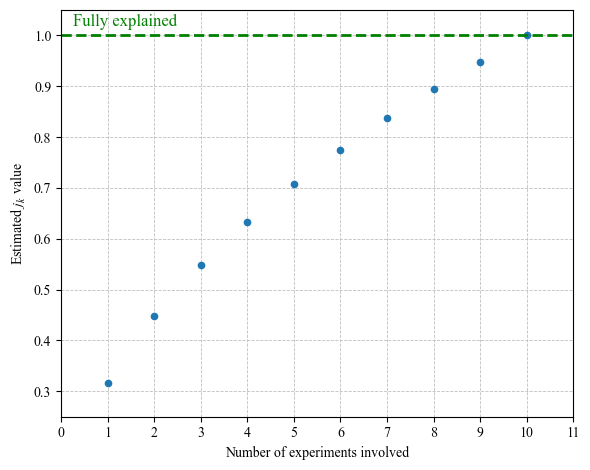

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Use Times New Roman for consistency
plt.rcParams["font.family"] = "Times New Roman"

# j_k = sqrt(k/10) for k experiments involved
k = np.arange(1, 11)
j = np.sqrt(k / 10.0)

fig, ax = plt.subplots(figsize=(6, 4.8))

# Plot points with literal "*" markers
ax.plot(k, j, linestyle="none", marker=".", markersize=9, color="tab:blue")

# Axis limits, ticks, and grid
ax.set_xlim(0, 11)
ax.set_ylim(0.25, 1.05)
ax.set_xticks(np.arange(0, 12, 1))
ax.grid(True, linestyle="--", linewidth=0.6, color="#bfbfbf")

# Axis labels
ax.set_xlabel("Number of experiments involved")
ax.set_ylabel(r"Estimated $j_k$ value")

# Reference line for full explanation
ax.axhline(1.0, color="green", linestyle="--", linewidth=2)
ax.text(0.25, 1.01, "Fully explained", color="green", fontsize=12, va="bottom")

plt.tight_layout()

plt.savefig("figures/Figure 8.png", dpi=600, bbox_inches="tight")
plt.show()


# Figure 9

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from collections import Counter

# --- Load ICSBEP benchmark group information from Excel ---
file_path = "data/keff_data_summary.xlsx"
df = pd.read_excel(file_path, sheet_name="ICSBEP handbook data", usecols=[0], skiprows=1, header=None)
entries = df[0].dropna().astype(str).tolist()

# Count groups by first three tokens (e.g., PU-MET-FAST)
group_counter = Counter()
for entry in entries:
    parts = entry.split('-')
    if len(parts) >= 3:
        group_key = '-'.join(parts[:3])
        group_counter[group_key] += 1

# Convert to DataFrame for sorting and display
group_df = pd.DataFrame(group_counter.items(), columns=["Group", "Count"])
group_df = group_df.sort_values(by="Group").reset_index(drop=True)

# --- Load benchmark data (pickle) ---
file_path = "data/benchmark_620.pkl"
with open(file_path, 'rb') as f:
    data = pickle.load(f)

m = data['meas_keff']    # measured keff values
k = data['calc_keff']    # calculated keff values
Cm = data['meas_cov']    # covariance of measured keff
Ck = data['calc_cov']    # covariance of calculated keff
names = data['names']    # benchmark names

total_indices = list(range(620))  # all benchmark indices

# --- Random sampling analysis ---
n = 1500
random.seed(1)
res = np.zeros((n,3))

for i in range(n):
    # Randomly pick 10 experiments + 1 application (total 11)
    selected_indices = random.sample(total_indices, 11)

    rk = k[selected_indices]   # selected calc keff
    rm = m[selected_indices]   # selected meas keff
    rCk = Ck[np.ix_(selected_indices, selected_indices)]  # submatrix of calc cov
    rCm = Cm[np.ix_(selected_indices, selected_indices)]  # submatrix of meas cov

    # --- Compute average correlation (c_k) ---
    std_dev = np.diag(np.sqrt(np.diag(rCk)))
    Rc = np.linalg.inv(std_dev) @ rCk @ np.linalg.inv(std_dev)
    ck_all = Rc[:-1, -1]       # correlation of each exp with application
    ck = np.mean(ck_all)

    # --- Compute j_k (collective explanatory power) ---
    Rd = np.linalg.inv(std_dev) @ (rCk + rCm) @ np.linalg.inv(std_dev)
    jk = np.sqrt(Rd[:-1, -1] @ np.linalg.inv(Rd[:-1, :-1]) @ Rd[:-1, -1])

    # --- Prediction performance (Bayesian updating) ---
    pk = rk[-1] - rCk[-1, :-1] @ np.linalg.inv(rCk[:-1, :-1] + rCm[:-1, :-1]) @ (rk[:-1] - rm[:-1])
    pCk = rCk[-1, -1] - rCk[-1, :-1] @ np.linalg.inv(rCk[:-1, :-1] + rCm[:-1, :-1] + np.eye(10)*1e-10) @ rCk[-1, :-1]
    pu = np.sqrt(pCk)
    score = (pk - rm[-1]) / pu  # normalized error

    res[i, :] = np.array([ck, jk, score])  # store results


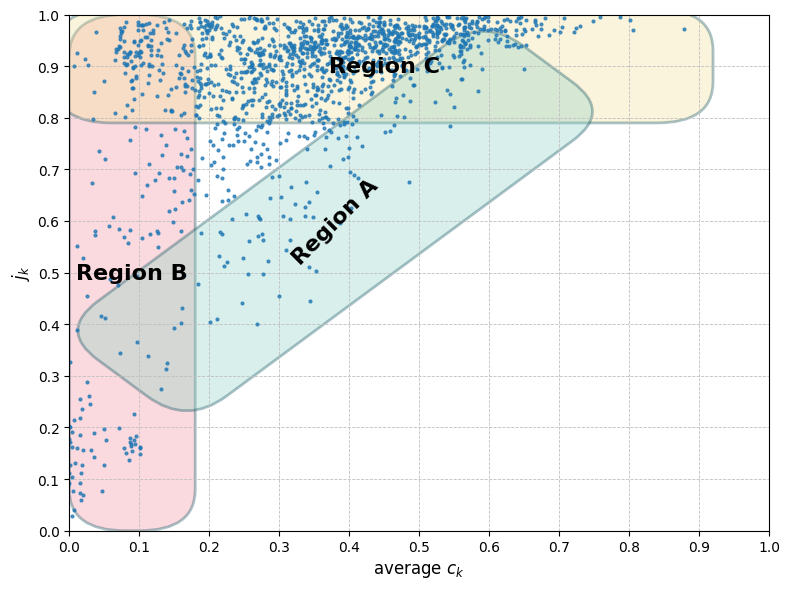

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from matplotlib import transforms

# --- scatter you already have ---
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(res[:, 0], res[:, 1], '.', color='#1f77b4', alpha=0.75, markersize=4, zorder=2)

# axes cosmetics
ax.set_xlim(0, 1); ax.set_ylim(0, 1)
ax.set_xticks(np.arange(0, 1.01, 0.1))
ax.set_yticks(np.arange(0, 1.01, 0.1))
ax.set_xlabel(r'average $c_k$', fontsize=12)
ax.set_ylabel(r'$j_k$', fontsize=12)
ax.grid(True, ls='--', lw=0.6, color='#bfbfbf')

# ---------- helper to draw a rounded rectangle (optionally rotated) ----------
def rounded_box(ax, center, width, height, angle_deg=0,
                facecolor='#cccccc', edgecolor='#154c5c',
                alpha=0.35, lw=2, rounding=0.08, label=None, zorder=1):
    """
    Draw a rounded rectangle centered at `center` with optional rotation.
    """
    cx, cy = center
    x0, y0 = cx - width/2, cy - height/2
    box = FancyBboxPatch((x0, y0), width, height,
                         boxstyle=f"round,pad=0.02,rounding_size={rounding}",
                         facecolor=facecolor, edgecolor=edgecolor,
                         linewidth=lw)
    if angle_deg != 0:
        tr = transforms.Affine2D().rotate_deg_around(cx, cy, angle_deg) + ax.transData
        box.set_transform(tr)
    else:
        box.set_transform(ax.transData)
    box.set_alpha(alpha)
    box.set_zorder(zorder)
    ax.add_patch(box)
    if label is not None:
        # place the label at the center, rotated with the box
        ax.text(cx, cy, label, ha='center', va='center',
                rotation=angle_deg, fontsize=16, fontweight='bold',
                color='k', zorder=zorder+1)

# ---------- Region overlays ----------
# Region B: vertical band on the left
rounded_box(ax, center=(0.09, 0.50), width=0.14, height=0.96,
            facecolor='#f297a2', edgecolor='#0d4f5e', label='Region B')

# Region C: horizontal band near the top-right
rounded_box(ax, center=(0.45, 0.90), width=0.90, height=0.18,
            facecolor='#f4e29b', edgecolor='#0d4f5e', label='Region C')

# Region A: diagonal band (rotated)
rounded_box(ax, center=(0.38, 0.60), width=0.82, height=0.22, angle_deg=45,
            facecolor='#92d3c6', edgecolor='#0d4f5e', label='Region A')

plt.tight_layout()
plt.savefig("figures/Figure 9.png", dpi=600, bbox_inches="tight")
plt.show()


# Figure 10

In [ ]:
matching_seeds_only = []

for seed in range(1000):
    total_indices = list(range(620))
    random.seed(seed)
    selected_indices = random.sample(total_indices, 100)

    rk = k[selected_indices]
    rm = m[selected_indices]
    rCk = Ck[np.ix_(selected_indices, selected_indices)]
    rCm = Cm[np.ix_(selected_indices, selected_indices)]
    rCd = rCk + rCm
    rNames = [names[i] for i in selected_indices]

    std_dev = np.diag(np.sqrt(np.diag(rCd)))
    with np.errstate(divide='ignore', invalid='ignore'):
        inv_std = np.linalg.inv(std_dev + 1e-12 * np.eye(std_dev.shape[0]))

    Rd = inv_std @ rCd @ inv_std

    row = Rd[0, :].copy()
    row[0] = np.inf
    closest_idx = np.argmin(np.abs(row - 0.7))

    if not (0.69 <= Rd[0, closest_idx] <= 0.71):
        continue

    remaining_indices = [i for i in range(100) if i not in (0, closest_idx)]
    random.shuffle(remaining_indices)
    new_order = [0, closest_idx] + remaining_indices

    rk = rk[new_order]
    rm = rm[new_order]
    rCk = rCk[np.ix_(new_order, new_order)]
    rCm = rCm[np.ix_(new_order, new_order)]
    rCd = rCk + rCm
    rNames = [rNames[i] for i in new_order]

    std_dev = np.diag(np.sqrt(np.diag(rCd)))
    inv_std = np.linalg.inv(std_dev + 1e-12 * np.eye(std_dev.shape[0]))
    Rd = inv_std @ rCd @ inv_std

    total_jk = np.sqrt(Rd[1:, 0] @ np.linalg.inv(Rd[1:, 1:]) @ Rd[1:, 0])
    if total_jk < 0.96:
        continue

    res_k, res_u = [rk[0]], [np.sqrt(rCk[0, 0])]
    final_jk = None

    for i in range(2, 101):
        try:
            inv_rCd = np.linalg.inv(rCd[1:i, 1:i] + 1e-12 * np.eye(i-1))
            jk = np.sqrt(Rd[1:i, 0] @ np.linalg.inv(Rd[1:i, 1:i]) @ Rd[1:i, 0])
        except np.linalg.LinAlgError:
            break

        if jk >= 0.95:
            if 0.94 <= jk <= 0.96:
                matching_seeds_only.append(seed)
            break


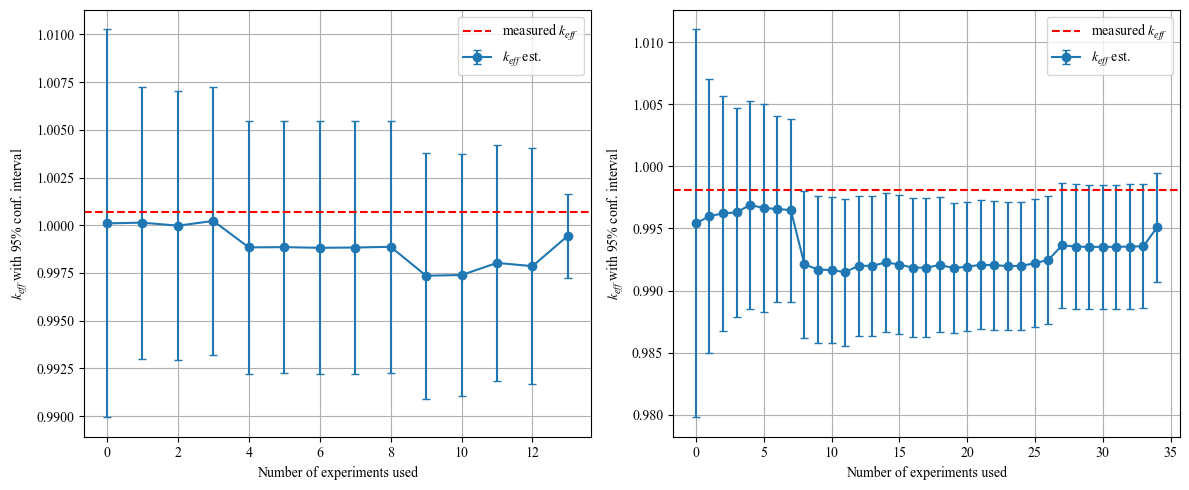

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import random

# --- Global font: Times New Roman for text and math ---
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Times New Roman"
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"

total_indices = list(range(620))

plt.figure(figsize=(12, 5))
seed_list = [5, 369]
data = []

for j in range(2):
    # Reproducible random subset for each panel
    random.seed(seed_list[j])
    selected_indices = random.sample(total_indices, 100)

    # Slice vectors/matrices for the chosen set
    rk = k[selected_indices]
    rm = m[selected_indices]
    rCk = Ck[np.ix_(selected_indices, selected_indices)]
    rCm = Cm[np.ix_(selected_indices, selected_indices)]
    rCd = rCk + rCm
    rNames = [names[i] for i in selected_indices]

    # Correlation-normalized matrix Rd
    std_dev = np.diag(np.sqrt(np.diag(rCd)))
    Rd = np.linalg.inv(std_dev) @ rCd @ np.linalg.inv(std_dev)

    # Put the item whose correlation to #0 is closest to 0.7 in position #1
    row = Rd[0, :]
    closest_idx = np.argmin(np.abs(row - 0.7))
    remaining_indices = [i for i in range(100) if i not in (0, closest_idx)]
    random.shuffle(remaining_indices)
    new_order = [0, closest_idx] + remaining_indices

    # Reorder everything accordingly
    rk = rk[new_order]
    rm = rm[new_order]
    rCk = rCk[np.ix_(new_order, new_order)]
    rCm = rCm[np.ix_(new_order, new_order)]
    rCd = np.copy(rCk)
    rCd[1:,1:] += rCm[1:,1:]
    rNames = [rNames[i] for i in new_order]

    # Recompute Rd after reordering
    std_dev = np.diag(np.sqrt(np.diag(rCd)))
    Rd = np.linalg.inv(std_dev) @ rCd @ np.linalg.inv(std_dev)

    # Total j_k if all except the 0th are used
    total_jk = np.sqrt(Rd[1:, 0] @ np.linalg.inv(Rd[1:, 1:]) @ Rd[1:, 0])

    # Storage for predictions/uncertainties/labels
    res_k, res_u, jk_all, bname = [rk[0]], [np.sqrt(rCk[0, 0])], [0.0], [rNames[0]]

    # Incrementally add experiments and update prediction of the 0th item
    for i in range(2, 101):
        pk = rk[0] - rCk[0, 1:i] @ np.linalg.inv(rCd[1:i, 1:i]) @ (rk[1:i] - rm[1:i])
        res_k.append(pk)

        pCk = rCk[0, 0] - rCk[0, 1:i] @ np.linalg.inv(rCd[1:i, 1:i]) @ rCk[0, 1:i]
        pu = np.sqrt(pCk)
        res_u.append(pu)

        jk = np.sqrt(Rd[1:i, 0] @ np.linalg.inv(Rd[1:i, 1:i]) @ Rd[1:i, 0])
        jk_all.append(jk)

        bname.append(rNames[i - 1])
        if jk >= 0.95:
            break

    data.append([res_k, res_u, jk_all, bname])

    # --- Plot panel j ---
    plt.subplot(1, 2, j + 1)
    # Predicted k_eff with 95% CI
    plt.errorbar(np.arange(len(res_k)), res_k, yerr=np.array(res_u) * 1.96,
                 fmt='o-', capsize=3, label=r"$k_{eff}$ est.")
    # Measured k_eff reference line
    plt.axhline(rm[0], color='red', linestyle='--', label=r"measured $k_{eff}$")

    plt.xlabel("Number of experiments used")
    plt.ylabel(r"$k_{eff}$ with 95% conf. interval")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.savefig("figures/Figure 10.png", dpi=600, bbox_inches="tight")
plt.show()
